<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/BotModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2


from keras.utils import np_utils
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


In [2]:
from google.colab import files
uploaded = files.upload()

Saving images.npy to images.npy
Saving labels.npy to labels.npy


In [3]:
images = np.load('/content/drive/MyDrive/dataFiles/images_1.npy')
labels = np.load('/content/drive/MyDrive/dataFiles/labels.npy')

(6047, 160, 160, 3)
(6047,)


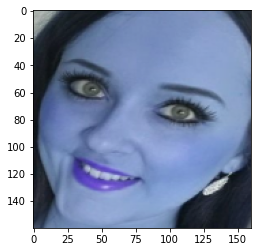

In [7]:
print(images.shape)
print(labels.shape)


plt.imshow(images[0,:,:,:])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state = 20)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.experimental.preprocessing import Rescaling
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras import optimizers

In [6]:
train_datagen = ImageDataGenerator(
rotation_range=20)
#width_shift_range=0.2,
#height_shift_range=0.2,
#zoom_range = 0.2,
#horizontal_flip=True)

In [7]:
img_size = 160
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, 3))

top_model = Sequential()

top_model.add(Flatten(input_shape=model.output_shape[1:]))

top_model.add(Dense(1024, activation="relu"))
top_model.add(Dense(1024, activation="relu"))


top_model.add(Dense(512, activation="relu"))



top_model.add(Dense(128, activation="relu"))

top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation="sigmoid"))

new_model = Sequential() #new model

for layer in model.layers: 
    new_model.add(layer)


new_model.add(top_model)


for layer in model.layers[1:22]:
    layer.trainable = False


new_model.compile(loss="binary_crossentropy",
 optimizer= optimizers.Adam(learning_rate = 0.1),
 metrics=["accuracy"])

new_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)      

In [ ]:
models_data = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=32),epochs=100,validation_data=(X_test,y_test))            

Epoch 1/100
152/152 [==============================] - 27s 180ms/step - loss: 0.7830 - accuracy: 0.5313 - val_loss: 3.8297 - val_accuracy: 0.4149
Epoch 2/100
152/152 [==============================] - 26s 173ms/step - loss: 0.6597 - accuracy: 0.6196 - val_loss: 3.2140 - val_accuracy: 0.4149
Epoch 3/100
152/152 [==============================] - 26s 174ms/step - loss: 0.6245 - accuracy: 0.6742 - val_loss: 0.7067 - val_accuracy: 0.6314
Epoch 4/100
152/152 [==============================] - 26s 173ms/step - loss: 0.6126 - accuracy: 0.6827 - val_loss: 0.7809 - val_accuracy: 0.5595
Epoch 5/100
152/152 [==============================] - 26s 172ms/step - loss: 0.6177 - accuracy: 0.6849 - val_loss: 174.3313 - val_accuracy: 0.5851
Epoch 6/100
152/152 [==============================] - 26s 172ms/step - loss: 0.6323 - accuracy: 0.6918 - val_loss: 2.3897 - val_accuracy: 0.4273
Epoch 7/100
152/152 [==============================] - 26s 171ms/step - loss: 0.6002 - accuracy: 0.6940 - val_loss: 1.1949

In [ ]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss')
  plt.plot(model.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['accuracy'], label='accuracy')
  plt.plot(model.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(models_data)

In [ ]:
new_model.summary()

In [ ]:
for layer in new_model.layers[:21]:
    layer.trainable = True

In [ ]:
new_model.summary()

In [ ]:
models_data_fine_tunning = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=1,validation_data=(X_test,y_test))     

In [ ]:
score = new_model.evaluate(X_test, y_test, verbose=0)
print("Loss after fine tunnig is: %f" %(score[0]))
print("Accuracy after fine tunnig is: %f"  %(score[1]))

In [ ]:
model.save(r'my_model.h5')